# 二分类指标

分类可能是实践中最常见的机器学习应用，也是概念最简单的应用。但是，即使是评估这个简单任务也仍行一些注意事项.在深入研究替代指标之前,我们先看测量精度可能会如何误导我们。对于二分类问题.我们通常会说**正类**(positive class)和**反类**(negative class)，而正类是我们要寻找的类。 

### 1 .错误类型

通常来说，精度并不能很好地度量预测性能，因为我们所犯错误的数量并不包含我们感兴趣的所有信息。想象一个应用.利用自动化测来筛查癌症的早期发现，如果测试结果为阴性，那么认为患者是健康的,而如果测试结果为阳性,患者则需要接受额外的筛查，这里我们将阳性测试结果(表示患有癌症)称为正类.将阴性测试结果称为反类。我们不能假设模型永远是完美的，它也会犯错。对于任何应用而言，我们都需要问问自己，这些错误在现实世界中可能有什么后果。

一种可能的错误是健康的患者被诊断为阳性，导致需要进行额外的测试。这给患者带来了一些费用支出和不便(可能还有精神上的苦)。错误的阳性预测叫作**假正例**(false positive)。另一种可能的饼误是患病的人被诊断为阴性，因而不会接受进一步的检查和治疗。未诊断出的癌症可能导致外重㈱健康问题,甚至可能致命。这种类型的错误(错误的阴性预测)叫作**假反例**(false negative)。在统计学中，假正例也叫作第一类错误(type Ⅰ error)， 假反例也叫作第二类错误(type II error)。我也将坚持使用“假正例"和“假反例" 的说法，因为它们的含义更加明确,也更好记。在癌症诊断的例子中，显然，我们希望尽量避免假反例，而假正例可以被看作是小麻烦。

虽然这是一个特别极端的例子，但假正例和假反例造成的结果很少相同。在商业应用中. 可以为两种类型的错误分配美元值，即用美元而不是精度来度量某个预测结果的错误。对于选择使用哪种模型的商业决策而言，这种方法研能更有意义。

### 2. 不平衡数据集

如果在两个类别中,一个类别的出现次数比另一个多很多，那么错误类别将发挥重要作用。这在实践中十分常见,一个很好的例子是点击(click-through)预测。其中每个数据点表示一个"印象" (impression)，即向用户展示的一个物项。这个物项可能是广告、相关的故事，或者是在社交媒体网站上关注的相关人员。目标是预测用户足否会点击看到的某个特定物项(表示他们感兴趣)。用户对互联网上显示的大多数内容(尤其是广告)都不会点击。你可能需要向用户展示100个广告或文章,他才会找到足够有趣的内容来点击查看，这样就会得到一个数据集，其中每99 个 “未点击"的数据点，才有一个"已点击"的数据点。换句话说，99%的样本属于“未点击"类别。这种一个类别比另一个类别出现次数多很多的数据集，通常叫作**不平衡数据集**(imbalanced dataset)或者**具有不平衡类别的数据集** (dataset with imbalanced classes)。在实际当中，不平撕数据才是常态，而数据中感兴趣事件的出现次数相同或相似的情况十分罕见。

现在假设你在构建一个在点击预测任务中精度达到99%的分类器。这告诉你什么？99%的精度听起来令人印象深刻，但是它并没有考虑类别不平衡。你不必构建机器学习模型,始终预测"未点击"就可以得到99%的精度。另一方而，即使是不平衡数据.精度达到99%的模型实际上也是相当不错的。但是,精度无法帮助我们区分不变的"未点击"模型与潜在的优秀模型。

In [1]:
# 为了便于说明,我们将digits数据集中的数字9与其他九个类别加以区分，从而创建一个 9:1的不平衡数据集

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

我们可以使用DummyClassifier来始终预测多数类(这里是"非9 ")，以查看精度提供的信息量有多么少：

In [2]:
from sklearn.dummy import DummyClassifier
# 该分类器用作与其他更复杂的分类器进行比较的简单基线
import numpy as np
# “most_frequent”: 该方法始终返回传递给predict的观察到的参数中最常见的类标签。该方法返回匹配的 one-hot 编码向量
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


我们得到了接近90%的精度，却没有学到任何内容。这个结果可能看起来相当好，但请思考一会儿。想象一下，有人告拆你他们的模型精度达到90%。你可能会认为他们做得很好。但根据具体问题，也可能是仅预测了一个类别！我们将这个结果与使用一个真实分类器的结果进行对比：

In [3]:
from sklearn.tree import DecisionTreeClassifier  # 决策树
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


从精度来看，DecisionTreeClassifier仅比常数预测稍好一点。这可能表示我们使用 DecisionTreeClassifter的方法有误，也可能是因为精度实际上在这里不是一个很好的度量。

为了便于对比,我们再评估两个分类器, LogisticRegression与默认的DunnyClasstfier,其中后者进行随机预测，但预测类别的比例与训练集中的比例相同：

In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


显而易见，产生随机输出的虚拟分类器是所有分类器中最差的(精度最低)，而LogisticRegression则给出了非常好的结果。但是，即使是随机分类器也得到了超过80%的精度。这样很难判断哪些结果是真正有帮助的。这里的问题在于，要想对这种不平衡数据的预测性能进行量化，精度并不是一种合适的度量。在接下来的内容中，我们将探索在选 择模型方面能够提供更好指导的其他指标。我们特别希望有一个指标可以告诉我们，一个模型比 "最常见"预测(由 pred_most_frequent给出)或随机预测(由pred_diwiy给出)要好多少。如果我们用一个指标来评估模型，那么这个指标应该能够淘汰这些无意义的预测。

### 3. 混淆矩阵

对于二分类问题的评估结果，一种最全面的表示方法是使用混淆矩阵(confusion malrix)。我们利用confusion_matrix函数来检查上一节LogisticRegression的预测结果。我们已经将测试集上的预测结果保存在pred_logreg中：

In [5]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n {}".format(confusion))

Confusion matrix:
 [[402   1]
 [  6  41]]


confusion_matrix 的输出是一个2 x 2 数组，其中行对应于真实的类别,列对应于预测的类别。数组中每个元素给出属干该行对应类别(这里是 非9 和 9 ) 的样本被分类到该列对应类别中的数量



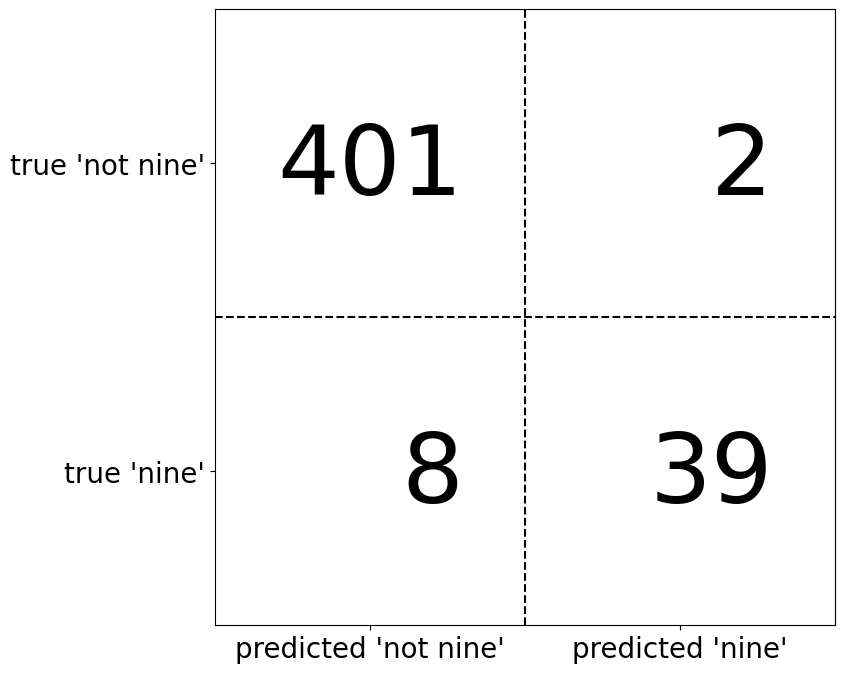

In [6]:
# "9与其他”分类任务的混淆矩阵
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

混淆矩阵主对角线上的元素对应于正确的分类，而其他元素则告诉我们一个类别中有多少样本被错误地划分到其他类别中



如果我们将"9” 作为**正类**，那么就可以将混淆矩阵的元素与前面介绍过的**假正例**(fake positive)和**假反例**(false negative)两个术语联系起来。为了使图像更加完整，我们将**正类**中正确分类的样本称为**真正例**(true posilive),将反类中正确分类的样本称为**真反例** (true negative)。 这些术语通常缩写为FP、FN、TP和TN ,这样就可以得到下图对混淆矩阵的解释

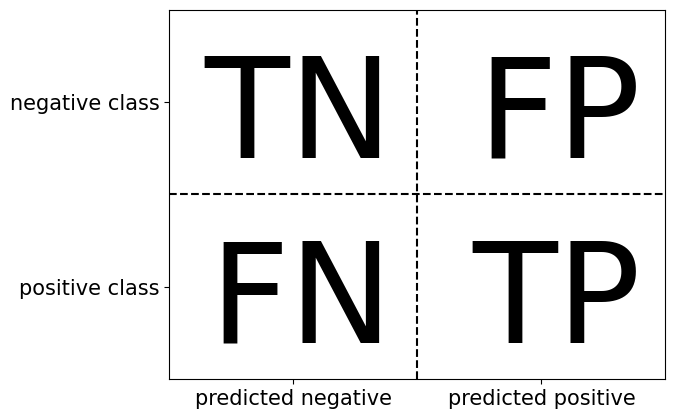

In [7]:
# 二分类混淆矩阵
mglearn.plots.plot_binary_confusion_matrix()

下面我们用混淆矩阵来比较前面拟合过的模型（两个虚拟模型、决策树和Logislic回归）:

In [8]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


观察混淆矩阵，很明显可以看出pred_most_frequent有问题，因为它总是预测同一个类别。另一方面，pred_dunmy的真正例0，特别是与假反例和假正例的数量相比--假正例的数量竟然比真正例正多! 决策树的预测比虚拟预测更有意义，即使二者精度几乎相同。最后，我们可以看到,Logistic回归在各方面都比pred_tree要好：它的真正例和真反例的数量更多，而假正例和假反例的数量更少。从这个对比中可以明确看出，只有决策树和Logistic回归给出了合理的结果，并且Logistic回归的效果全面好于决策树。但是，检查整个混淆矩阵有点麻烦，虽然我们通过观察矩阵的各个方面得到了很多深人见解，但是这个过程是人工完成的，也是非常定性的。

**矩阵中包含的信息:**

(1) 与精度的关系

一种总结混淆矩阵结果的方法 计算精度，其公式表达如下所示：

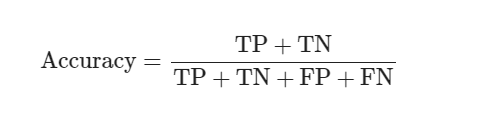

换句话说，精度是正确预测的数量（TP和TN）除以所有样本的数量（混淆矩阵中所有元素的总和）。

（2）准确率、召回率与f分数

总结混淆矩阵有几种方法，其中最常见的就是准确率和召回率。

**准确率**（precision） 度量的是被预测为正例的样本中有多少是真正的正例：

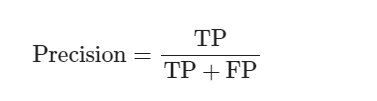

如果目标是限制假正例的数量，那么可以使用准确率作为性能指标。

模型不会产生很多假正例是很重要的，换句话说，模型的准确率很高。准确率也波称为**阳性预测值**(positive predictive value, PPV) 。 

另一方面，召回率(recall)度量的是正类样本中有多少被预测为正类:

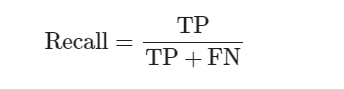

如果我们需要找出所有的iE类样本，即避免假反例是很重要的情况下，那么可以使用召回率作为性能指标。

召回率的其他名称有**灵敏度**(sensitivity)、**命中率**(hit rate)和**真正例率**(true positive rate, TPR)。 

在优化召回率与优化准确率之间需要折中。如果你预测所有样本都属于正类，那么可以轻松得到完美的召回率，没有假反例，也没有真反例。但是，将所有样本都预测为正类，将会得到许多假正例，因此准确率会很低。与之相反，如果你的模型只将一个最确定的数据点预测为正类，其他点部预测为反类，那么准确率将会很完美(假设这个数据点实际上就属于正类)，但是召回率会作常差。


虽然准确率和召回率是非常重要的度量，但是仅查看二者之一无法为你提供完整的图景。将两种度量进行汇总的一种方法是**f分数**(f-score)或**f度量**(f-measure)。它是准确率与召回率的调和平均：

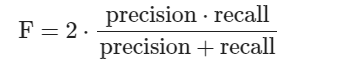

这一特定变体也被称为f分数(f-score)。由于同时考虑了准确率和召回率，所以它对于不平衡的二分类数据集来说是一种比精度更好的度量。我们对之前计算过的"9与其余”数据集的预测结果计算f分数。这里我们假定 9 类是正类(标记为True,其他样本被标记为False),因此正类是少数类：

In [9]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.3f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.3f}".format(f1_score(y_test, pred_dummy))) 
print("f1 score tree: {:.3f} ".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.3f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.000
f1 score dummy: 0.000
f1 score tree: 0.554 
f1 score logistic regression: 0.921


这里我们可以注意到两件事情。第一,我们从most_frequent的预测中得到一条错误信息, 因为预测的正类数量为0(使得户分数的分母为0)。第二，我们可以看到虚拟预测与决策树预测之间有很大的区别，而仅观察精度时二者的区别并不明显。利用了分数进行评估, 我们再次用一个数字总结了预测性能。但是，户分数似乎比精度更加符合我们对好模型的直觉。然而，f分数的一个缺点是比精度更加难以解释。

如果我们想要对准确率、召回率和f分数做一个更全面的总结,可以使用classification_report 这个很方便的函数，它可以同时计算这三个值，并以美观的格式打印出来：

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report 函数为每个类别(这里是True和 False)生成一行，并给出以该类别作为正类的准确率、召回率和f分数。前面我们假设较少的 9 类是正类。如果将正类改为"not nine"(非9 ) , 我们可以从classification_report 的输出中看出，利用 most_frequent模型得到的f分数为 0.94。此外，对于 "not nine" 类别，召回率是1 , 因 为我们将所有样本那分类为"nol nine"。f分数旁边的最后一列给出了每个类别的支持(support)，它表示的是在这个类别中真实样本的数量。 

分类报告的最后一行显示的是对应指标的宏平均和加权平均(按每个类别中的样本个数加权)。下面还有两个报告，一个是虚拟分类器的, 一个是Logistic回归的：

In [11]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



在查看报告时你可能注意到在虚拟模型与好模型之间的区别不再那么明显。选择哪个类作为正类对指标有很大影响。虽然在以"nine"类作为正类时虚拟分类的户分数是0.10 (对比Logistic回归的0.89)，而以"not nine "类作为正类时二者的户分数分别是0.91和0.99，两个结果看起来都很合理。不过同时查看所有数字可以给出非常准确的图像，我们可以清楚地看到Logistic回归模型的优势。 

### 4. 考虑不确定性

混淆矩阵和分类报告为一组特定的预测提供非常详细的分析。但是，预测本身已经丢弃了模型中包含的大量信息。正如我们在前面讨论的那样,大多数分类器都提供了一个deciston_function或 predict_proba方法来评估预测的不确定度。预测可以被看作是以某个固定点作为decision_function或 predict_proba输出的阈值 ————在二分类问题中，我们使用0 作为决策函数的阈值,0.5作为predict_proba的阈值。 

下面是一个不平衡二分类任务的示例，反类中有400个点，而正类中只有50个点。训练数据如下图左侧所示。我们在这个数据上训练一个核SVM模型，训练数据右侧的图像将决策函数值绘制为热图。你可以在图像偏上的位置看到一个黑色圆圈，表示decision_function 的阈值刚好为0。在这个圆圈内的点将被划为正类，圆圈外的点将被划为反类：

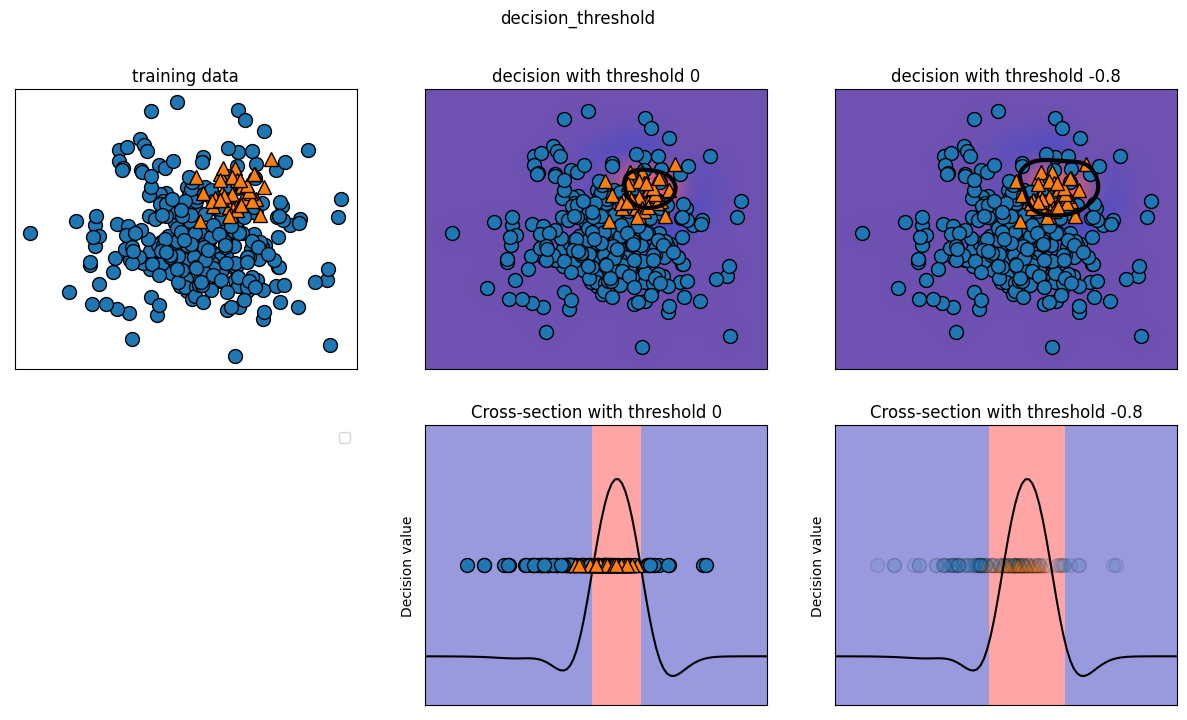

In [13]:
# 决策函数的热图与改变决策阚值的影响
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# n_samples：该参数指定数据集中的点（样本）总数。
# 在本例中，您有一个 tuple (400, 50)，这意味着第一个 blob 将有 400 个样本，第二个 blob 将有 50 个样本。Blob 是数据点的簇。

# cluster_std：该参数定义簇的标准差。它也是一个对应于 blob 数量的元组。
#在您的例子中，第一个 blob 的标准差设置为 7.0，第二个 blob 的标准差设置为 2.0。这会影响每个簇内点的分布方式。

# 该代码生成一个综合数据集，其中包含 450 个数据点，分布在具有不同标准差的两个集群（blob）中。每个数据点的标签存储在数组中y。
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
# SVC(gamma=0.5): 创建了一个支持向量机分类器对象。gamma 参数控制了核函数的宽度，这里设置为 0.05。gamma 的值越小，决策边界的形状越宽泛；值越大，决策边界越紧凑。
mglearn.plots.plot_decision_threshold()

我们可以使用classification_report函数来评估两个类别的准确率与召回率:

In [14]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



对干类别1 ,我们得到了一个相当低的准确率，而召回率则令人糊涂(mixed)。由干类别 0 要大得多，所以分类器将重点放在将类别0 分类正确，而不要较小的类别1。

假设在我们的应用中,类别1具有高召回率更加重要，正如前面的癌症筛查例子那样。这意味着我们愿意冒险有更多的假正例(假的类别1)，以换取更多的真止例(可增大召回率)。SVC.predict生成的预测无法满足这个要求，但我们可以通过改变决策阈值不等于 0 来将预测重点放在使类别1的召回率更高。默认情况下,decision_function值大于0的点将被划为类别1。我们希望将更多的点划为类别1，所以需要减小阈值：

In [15]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

这个预测的分类报告：

In [16]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



正如所料，类别1的召回率增大，唯确率减小。现在我们符更大的空间区域划为类别1, 正如上图右上图中所示。如果你认为准确率比召回率更重要，或者反过来，或者你的数据严重不平衡,那么改变决策阈值是得到更好结果的最简单方法。由于decision-function 的取值可能在任意范围. 所以很难提供关干如何选取阈值的经验法则。

如果你设置了阈值，那么要小心不要在测成集上这么做，与其他任何参数一样，在测试集上设置决策阈值可能会得到过于乐现的结果。可以使用验证集或交叉验证来代替，

对于实现了 predict_proba方法的模型来说，选择阈值可能更简单，因为predict_proba的输出固定在0 到 1的范围内，表示的是概率。默认情况下 0.5的阈值表示,如果模型以超过50%的概率“确信”一个点属于正类，那么就将其划为止类.增大这个阈值意味着模型需要更加确信才能做出反类的判断(较低程度的确信就可以做出反类的判断)。虽然使用概率可能比使用任意阈值更加直观，但并非所有模型都提供了不确定性的实际模型(一棵生长到最大深度的DecisionTcee总是 100%确信其判断"，即使很可能是错的)。这与校准(calibration) 的概念相关：校准模型是指能够为其不确定性提供精确度量的模型。

### 5. 准确率-召回率曲线

如前所述，改变模型中用于做出分类决策的阈值，是一种调节给定分类器的准确率和召同率之间折中的方法。你可能希望仅遗漏不到10%的正类样本，即希望召回率能达到90%。这一决策取决于应用，应该是由商业目标驱动的。一旦设定一个具体目标(比如对某一类别的特定召回率或准确率)，就可以适当地设定一个阈值。总是可以设置一个阈值来满足特定的目标，比如90%的召问率。难点在于开发一个模型，在满足这个阈值的同时仍具有合理的准确率，如果你将所有样本都划为支类，那么将会得到100%的召回率，但你的模型毫无用处。

对分类器设置要求(比如90%的召回率)通常被称为设置**工作点**(operating point)。在业务中固定工作点通常有助于为客户或组织内的其他小组提供性能保证。

在开发新模型时，通常并不完全清楚通作点住哪里，因此，为了更好地理解建模问题，很有启发性的做法是，同时查看所有切能的阈值或准确率和召回率的所有可能折中。利用一种叫作准确率——召回率曲线(precision-recall curve)的工具可以做到这一点。你可以在 sklearn.metrics模块中找到计算准确率——召回率曲线的函数。这个函数需要真实标签与预测的不确定度，后者由decision_function或 predict一proba给出：

In [17]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

precision_recall_curve函数返回一个列表，包含按顺序徘序的所有可能阈值(在决策 函数中出现的所有值)对应的准确率和召回率，这样我们就可以绘制一条曲线，如图所示：

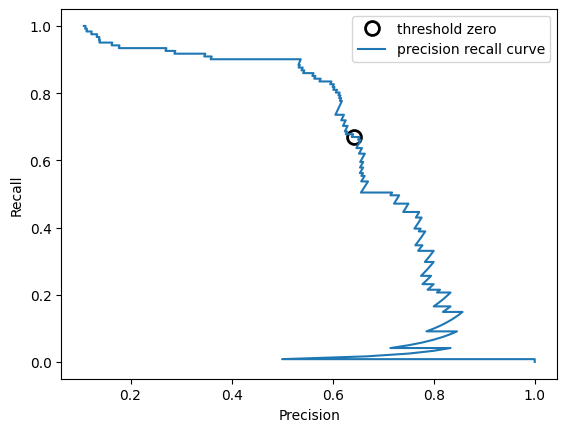

In [18]:
# SVC (gamma=0.05)的准确率-召回率曲线

# 使用更多的数据点来得到更加平滑曲线
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 找到最接近0的阈值
# np.argmin 和 np.abs 是 NumPy 中的两个常用函数，分别用于找到数组中最小值的索引和计算数组元素的绝对值。
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

图中曲线上的每一个点都对应decision一function的一个可能的阈值。例如，我们可以看到, 在准确率约为0.75的位置对应的召回率为0.4。黑色圆圈表示的是阈值为0的点, 0是 decision一function的默认阈值。这个点是在调用predict方法时所选择的折中点。 

曲线越靠近右上角，则分类器越好，右上角的点表示对干同一个阈值，近确率和召回率都很高。曲线从左上角开始，这里对应干非常低的阈值,将所有样本都划为正类。提高阈值可以让曲线向准确率更高的方向移动,但同时召回率降低.继续增大阈值，大多数被划为正类的点都是真正例,此时准确率很高,但同时回率更低。随着准确率的升高，模型越能够保持较高的召回率，则模型越好。

进一步观察这条曲线，可以发现，利用这个模型可以得到约0.5的隹确率，同时保持很高的召回率。如果我们想要更高的准确率，那么就必须牺牲很多召回率。换句话说，曲线左侧相对平坦，说叫在准确率提高的同时召回率没有下降很多。当准确率大于0.5之后，准确率每增加一点都会导致召回率下降许多。

不同的分类器可能在曲线上不同的位置(即在不同的工作点)表现很好。我们来比较一下在同一数据集上训练的 SVM 与随机森林。RandomForestClassifier没有decision_function ,只有 predict_probao。precision—recall_curve 函数的第二个参数应该是正类 (类别1) 的确定性度量，所以我们传入样本属于类别1的 概率(即 rf.predtct_proba(X_test)[:, 1])。二分类问题的predict_proba的默认阈值是0.5 ,所以我们在曲线上标出这个点：

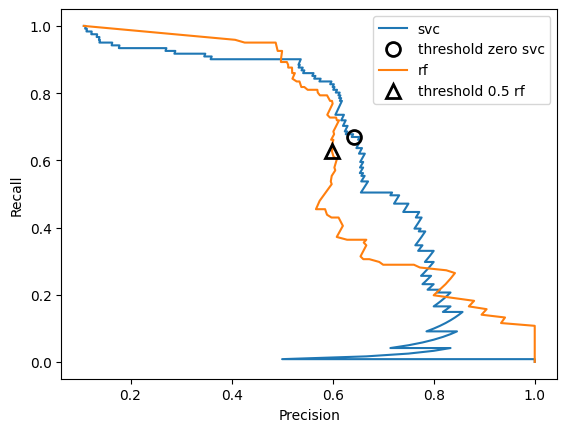

In [19]:
# 比较SVM与随机森林的准确率-召回率曲线
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

# np.argmin 和 np.abs 是 NumPy 中的两个常用函数，分别用于找到数组中最小值的索引和计算数组元素的绝对值。
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

从这张对比图中可以看出，随机森林在极值处(要求很高的召回率或很高的准确率)的表现更好。在中间位置(准确率约为0.7) SVM的表现更好。如果我们只查看f-分数来比较二者的总体性能,那么可能会遗漏这些细节。f-分数只反映了准确率-召回率曲线上的一个点，即默认阈值对应的那个点：

In [20]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


比较这两条准确率一召回率曲线，可以为我们提供大量洋细的洞见，但这是一个相当麻烦的过程。对于自动化模型对比，我们打能希望总结曲线中包含的信息，而不限干某个特定的阈值或工作点。总结准确率-召回率曲线的一种方法是计算该曲线f 的积分或面积、也叫作**平均准确率**(average precision)。你可以使用average_precision_score函数来计算平均准确率。因为我们要计算准确率-召回率曲线并考虑多个阈值，所以需要向averag_preasion_score 传人 decision_function 或 predict_proba 的结果，而不是 predict 的结果：

In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

这与前面从fl_score 中得到的结果大为不同，因为平均准确率是从0 到 1的曲线下的面积，所以平均准确率总是返回一个在0 (最差 )到 1 (最好)之间的值。随机分配decision_function的分类器的平均准确率是数据集中正例样本所占的比例。

### 6. 受试者工作特征(ROC)与AUC

还有一种常用的工具可以分析不同阈值的分类器行为：**受试者工作特征曲线**(receiver operating characteristics curve),简称为 **ROC 曲 线** (ROC curve)，与准确率-召回率曲线类似，ROC曲线考虑了给定分类器的所有可能的阀值，但它显示的是**假正例率**(false positive rate, FPR)和**真正例率**(true positive rale, TPR)，而不是报告准确率和召回率。 回想一下，真正例率只是召回率的另一个名称，而假正例率则是假正例占所有反类样本的比例：

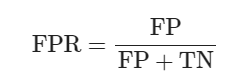

可以用roc_curve函数来计算ROC曲线:

In [ ]:
#  SVM 的ROC 曲线
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
# np.argmin 和 np.abs 是 NumPy 中的两个常用函数，分别用于找到数组中最小值的索引和计算数组元素的绝对值。
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

对于ROC 曲线，理想的曲线要靠近左上角：你希望分类器的召回率很高，同时保持假正例率很低。从曲线中可以看出，与默认阈值0相比，我们可以得到明显更高的召回率(约0.9),而FPR仅稍有增加。最接近左上角的点可能是比默认选择更好的工作点。同样请注意，不应该在测试集上选择阈值，而是应该在鼠独的验证集上选择。

In [ ]:
# 比较SVM 和随机森林的ROC 曲线

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
# np.argmin 和 np.abs 是 NumPy 中的两个常用函数，分别用于找到数组中最小值的索引和计算数组元素的绝对值。
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

与准确率-召回率曲线一样，我们通常希望使用一个数字来总结ROC 曲线.即曲线下的面积，通常被称为AUC（area under the curve），这也的曲线指的就是ROC 曲线,我们可 
以利用roc_auc_score 函数来计算ROC 曲线下的面积：

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

利用AUC 分数来比较随机森林和SVM， 我们发现随机森林的表现比SVM 要略好一些。回想一下，由于平均准确率是从0 到 1的曲线下的面积，所以平均准确率总是返回一个0（最差）到 1 （最好）之间的值。随机预测得到的AUC 总是等干0.5,无论数据集中的类别多么不平衡。对于不平衡的分类问题来说，AUC 是一个比精度好得多的指标。AUC 可以被解释为评估正例样本的排名（ranking）。它等价于从正类样本中随机挑选一个点，由分 类器给出的分数比从反类样本中随机挑选一个点的分数更高的概率。因此，AUC 最高为1，这说明所有正类点的分数高于所有反类点。对 r不平衡类别的分类问题，使用 AUC 进行模型选择通常比使用精度更有意义。

我们回到前面研究过的例子：将 digits数据集中的所有9 与所有其他数据加以区分。我们将使用SVM 对数据集进行分类，分别使用三种不同的内核宽度（gamma）设置

In [ ]:
# 对比不同gama值的SVM的ROC曲线
from sklearn.datasets import load_digits
digits = load_digits()

y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

对于三种不同的gamma设置,其精度是相同的,都等于90%。这可能与随机选择的性能相同，也可能不同。但是观察AUC以及对应的曲线，我们可以看到三个模型之间有明显的区别。对于gamma=1.0, AUC 实际上处于随机水平，即 decision_function，的输出与随机 结果一样好。对于gamma=0.05,性能大幅提升至AUC 等于0.9。最后，对于gamma=0.01, 我们得到等干1.0的完美AUC。这意味着根据决策函数，所有正类点的排名要高于所有反类点。换句话说，利用正确的阈值，这个模型可以对所有数据进行完美分类。知道这一点，我们可以调节这个模型的阈值并得到很好的预测结果。如果我们仅使用精度，那么将永远不会发现这一点。

因此，我们强烈建议在不平在数据上评估模型时使用AUC ,但请记住,AUC没有使用默认阈值,因此,为了从高AUC的模型中得到有用的分类结果，可能还需要叫节决策阈值.